In [106]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(city_data, ride_data, on="city").sort_values("city")

# Display the data table for preview
merge_table.head()

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


## Bubble Plot of Ride Sharing Data

In [107]:
# Obtain the x and y coordinates for each of the three city types

urban_cities = merge_table.loc[(merge_table["type"] == 'Urban')]
suburban_cities = merge_table.loc[(merge_table["type"] == 'Suburban')]
rural_cities = merge_table.loc[(merge_table["type"] == 'Rural')]

rides = merge_table.groupby(["city", "type"])[["ride_id"]].count()
urban_rides = urban_cities.groupby(["city", "type"])[["ride_id"]].count()
suburban_rides = suburban_cities.groupby(["city", "type"])[["ride_id"]].count()
rural_rides = rural_cities.groupby(["city", "type"])[["ride_id"]].count()

fares = merge_table.groupby(["city", "type"])[["fare"]].mean()
urban_fares = urban_cities.groupby(["city", "type"])[["fare"]].mean()
suburban_fares = suburban_cities.groupby(["city", "type"])[["fare"]].mean()
rural_fares = rural_cities.groupby(["city", "type"])[["fare"]].mean()

drivers = city_data.set_index('city').sort_values("city")
urban_drivers = city_data.loc[(city_data["type"] == 'Urban')]
suburban_drivers = city_data.loc[(city_data["type"] == 'Suburban')]
rural_drivers = city_data.loc[(city_data["type"] == 'Rural')]

drivers.head()

,driver_count,type
city,,
Amandaburgh,12,Urban
Barajasview,26,Urban
Barronchester,11,Suburban
Bethanyland,22,Suburban
Bradshawfurt,7,Rural


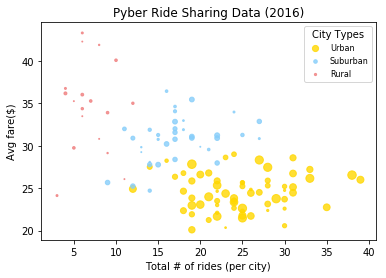

In [108]:
# Build the scatter plots for each city types
labels = ["Urban", "Suburban", "Rural"] 
colors = ["gold", "lightskyblue", "lightcoral"]

u = plt.scatter(urban_rides["ride_id"], urban_fares["fare"], marker='o', color=colors[0], 
    s=urban_drivers["driver_count"], alpha=0.8)
s  = plt.scatter(suburban_rides["ride_id"], suburban_fares["fare"], marker='o', color=colors[1],
    s=suburban_drivers["driver_count"], alpha=0.8)
r  = plt.scatter(rural_rides["ride_id"], rural_fares["fare"], marker='o', color=colors[2],
    s=rural_drivers["driver_count"], alpha=0.8)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total # of rides (per city)")
plt.ylabel("Avg fare($)");

# Create a legend

plt.legend((u, s, r),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           loc='upper right',
           fontsize=8, title="City Types")
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("images/scatter.png")

In [109]:
# Show plot
plt.show()

## Total Fares by City Type

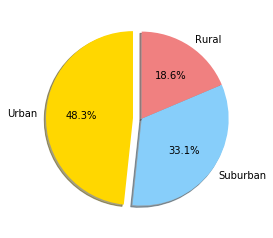

In [110]:

explode = (0.1, 0, 0)
# Calculate Type Percents

total_urban_fares = urban_fares["fare"].sum()
total_suburban_fares = suburban_fares["fare"].sum()
total_rural_fares = rural_fares["fare"].sum()

type_fares = [total_urban_fares, total_suburban_fares, total_rural_fares]

# Build Pie Chart

plt.pie(type_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Save Figure
plt.savefig("images/fares.png")

In [111]:
# Show Figure
plt.show()

## Total Rides by City Type

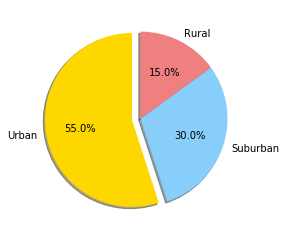

In [112]:
# Calculate Ride Percents

total_urban_rides = urban_rides["ride_id"].count()
total_suburban_rides = suburban_rides["ride_id"].count()
total_rural_rides = rural_rides["ride_id"].count()

type_rides = [total_urban_rides, total_suburban_rides, total_rural_rides]
# Build Pie Chart

plt.pie(type_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# Save Figure
plt.savefig("images/rides.png")

In [113]:
# Show Figure
plt.show()

## Total Drivers by City Type

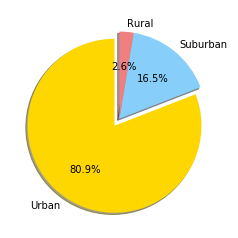

In [114]:
# Calculate Driver Percents

total_urban_drivers = urban_drivers["driver_count"].sum()
total_suburban_drivers = suburban_drivers["driver_count"].sum()
total_rural_drivers = rural_drivers["driver_count"].sum()

type_drivers = [total_urban_drivers, total_suburban_drivers, total_rural_drivers]

# Build Pie Charts
plt.pie(type_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# Save Figure
plt.savefig("images/drivers.png")

In [115]:
# Show Figure
plt.show()